<a href="https://colab.research.google.com/github/spros1/DistanceJoin/blob/main/DistanceJoin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###First we need to install everything needed in order to run Python & Apache Spark in Colab


In [ ]:
# install Java8
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

In [ ]:
# download spark3.2.1
!wget -q https://ftp.cc.uoc.gr/mirrors/apache/spark/spark-3.2.1/spark-3.2.1-bin-hadoop2.7.tgz 

In [ ]:
# unzip it
!tar xvf spark-3.2.1-bin-hadoop2.7.tgz

spark-3.2.1-bin-hadoop2.7/
spark-3.2.1-bin-hadoop2.7/LICENSE
spark-3.2.1-bin-hadoop2.7/NOTICE
spark-3.2.1-bin-hadoop2.7/R/
spark-3.2.1-bin-hadoop2.7/R/lib/
spark-3.2.1-bin-hadoop2.7/R/lib/SparkR/
spark-3.2.1-bin-hadoop2.7/R/lib/SparkR/DESCRIPTION
spark-3.2.1-bin-hadoop2.7/R/lib/SparkR/INDEX
spark-3.2.1-bin-hadoop2.7/R/lib/SparkR/Meta/
spark-3.2.1-bin-hadoop2.7/R/lib/SparkR/Meta/Rd.rds
spark-3.2.1-bin-hadoop2.7/R/lib/SparkR/Meta/features.rds
spark-3.2.1-bin-hadoop2.7/R/lib/SparkR/Meta/hsearch.rds
spark-3.2.1-bin-hadoop2.7/R/lib/SparkR/Meta/links.rds
spark-3.2.1-bin-hadoop2.7/R/lib/SparkR/Meta/nsInfo.rds
spark-3.2.1-bin-hadoop2.7/R/lib/SparkR/Meta/package.rds
spark-3.2.1-bin-hadoop2.7/R/lib/SparkR/NAMESPACE
spark-3.2.1-bin-hadoop2.7/R/lib/SparkR/R/
spark-3.2.1-bin-hadoop2.7/R/lib/SparkR/R/SparkR
spark-3.2.1-bin-hadoop2.7/R/lib/SparkR/R/SparkR.rdb
spark-3.2.1-bin-hadoop2.7/R/lib/SparkR/R/SparkR.rdx
spark-3.2.1-bin-hadoop2.7/R/lib/SparkR/help/
spark-3.2.1-bin-hadoop2.7/R/lib/SparkR/help/An

In [ ]:
# install findspark 
!pip install -q findspark

In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.2.1-bin-hadoop2.7"

#### A test in order to check that all are ok

In [ ]:
import findspark
findspark.init()                                               # make pyspark importable as a regular library
from pyspark.sql import SparkSession                           # create Spark session
spark = SparkSession.builder.master("local[*]").getOrCreate()

# Test spark
df = spark.createDataFrame([{"hello": "world"} for x in range(1000)])
df.show(5)

+-----+
|hello|
+-----+
|world|
|world|
|world|
|world|
|world|
+-----+
only showing top 5 rows



# Now lets start :
For two sets given A and B ( with values (ID,X,Y) ) : <br>
Find the pairs (a,b), where a in Α and b in Β, 
to wich it applies : d(a,b) ≤ c, where c parameter given from the user 

### First we are going to make a routine in order to produce two csv files with the number of records that the user will give


In [ ]:
# imports that are going to be used for the population for our two datasets 
import random
import time
from random import sample
import csv
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
def get_generated_points( gen_num, csv_name):
  
  x = random.sample(range(1, gen_num+1), gen_num)
  y = random.sample(range(1, gen_num+1), gen_num)

  fin_data = list(zip(x,y))
 
# generate csv
  with open(csv_name, "a") as f:
    f.truncate(0)
    coords = [map(str, tupl) for tupl in fin_data]
    writer = csv.writer(f, delimiter=',')

    for line in coords:
      writer.writerow(line)

# plot it also that 
  plt.scatter(x, y)
  plt.show()

  return fin_data

#### Now the user must give the max number of points for the two datasets

In [ ]:
inpCSV_total_points = 0
try:
  inpCSV_total_points = int(input("Enter the max value for csv with inp points : "))
except ValueError:
    print("This is not a number")   

Enter the max value for csv with inp points : 100


In [ ]:
trainCSV_total_points = 0
try:
  trainCSV_total_points = int(input("Enter the max value for csv with train points : "))
except ValueError:
    print("This is not a number")   

Enter the max value for csv with train points : 50


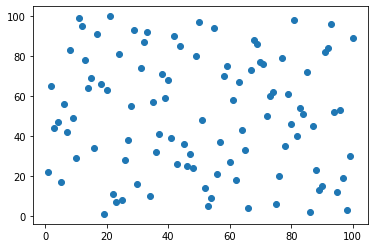

[(40, 68), (64, 43), (55, 94), (43, 26), (67, 73), (87, 45), (25, 8), (20, 63), (8, 83), (24, 81), (83, 54), (13, 78), (29, 93), (26, 28), (33, 92), (17, 91), (10, 29), (48, 24), (44, 85), (88, 23), (16, 34), (70, 77), (69, 86), (6, 56), (68, 88), (56, 21), (45, 36), (75, 6), (15, 69), (31, 74), (2, 65), (51, 48), (50, 97), (3, 44), (23, 7), (11, 99), (7, 42), (71, 76), (47, 31), (32, 87), (81, 98), (59, 75), (65, 33), (91, 82), (96, 53), (38, 71), (1, 22), (79, 61), (93, 96), (89, 13), (54, 9), (35, 57), (52, 14), (57, 37), (60, 27), (63, 67), (77, 79), (98, 3), (42, 90), (58, 70), (85, 72), (72, 50), (84, 51), (5, 17), (21, 100), (49, 80), (14, 64), (82, 40), (41, 39), (100, 89), (39, 59), (74, 62), (34, 10), (61, 58), (76, 20), (12, 95), (92, 84), (4, 47), (53, 5), (97, 19), (46, 25), (18, 66), (90, 15), (28, 55), (30, 16), (27, 38), (73, 60), (95, 12), (62, 18), (19, 1), (86, 2), (66, 4), (99, 30), (94, 52), (37, 41), (36, 32), (80, 46), (22, 11), (9, 49), (78, 35)]




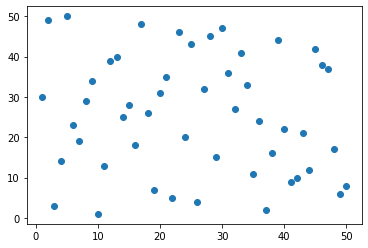

[(16, 18), (42, 10), (19, 7), (14, 25), (32, 27), (39, 44), (30, 47), (21, 35), (17, 48), (5, 50), (3, 3), (48, 17), (25, 43), (45, 42), (4, 14), (23, 46), (22, 5), (49, 6), (6, 23), (24, 20), (2, 49), (12, 39), (8, 29), (31, 36), (15, 28), (38, 16), (28, 45), (26, 4), (29, 15), (33, 41), (36, 24), (37, 2), (44, 12), (18, 26), (20, 31), (35, 11), (27, 32), (46, 38), (40, 22), (9, 34), (50, 8), (41, 9), (34, 33), (47, 37), (10, 1), (13, 40), (11, 13), (1, 30), (7, 19), (43, 21)]


In [ ]:
# create the input dataset
inpPoints = get_generated_points(inpCSV_total_points , 'InputCSV.csv')
print(inpPoints)

print('\n')

trainPoints = get_generated_points(trainCSV_total_points , 'TrainCSV.csv')
print(trainPoints)

### Read from the two csvs the data
(from the two we create or other , it is the same just change the name of input file)


In [ ]:
# importing the required module
from pyspark.sql import SparkSession
from pyspark.sql import functions as f
from pyspark.sql.functions import lit,col,concat
import os

In [ ]:
# give the path of input and train file to read 
inpFile   = "InputCSV.csv" 
trainFile = "TrainCSV.csv"

In [ ]:
# Initialize Spark session
t0 = int(round(time.time() * 1000))

In [ ]:
spark = SparkSession.builder.appName("CSV").master("local").getOrCreate()             # Creates a session on a local master


In [ ]:
t1 = int(round(time.time() * 1000))

print("Session initialized in {} ms".format(t1 - t0))

Session initialized in 8487 ms


In [ ]:
df_inp   = spark.read.csv(inferSchema=True, path=inpFile).toDF("inpX"  ,"inpY"  )     # Reads input CSV file with no header, in a dataframe
df_train = spark.read.csv(inferSchema=True, path=trainFile).toDF("trainX","trainY")   # Reads train CSV file with no header, in a dataframe

In [ ]:
t2 = int(round(time.time() * 1000))
print("Initial dataframe built in {} ms".format(t2 - t1))

Initial dataframe built in 8726 ms


In [ ]:
print("*** Right after ingestion ***")

df_inp.show(5)
print("We have {} input records.".format(df_inp.count()))

print('\n')

df_train.show(5)
print("We have {} train records.".format(df_train.count()))

*** Right after ingestion ***
+----+----+
|inpX|inpY|
+----+----+
|  40|  68|
|  64|  43|
|  55|  94|
|  43|  26|
|  67|  73|
+----+----+
only showing top 5 rows

We have 100 input records.


+------+------+
|trainX|trainY|
+------+------+
|    16|    18|
|    42|    10|
|    19|     7|
|    14|    25|
|    32|    27|
+------+------+
only showing top 5 rows

We have 50 train records.


In [ ]:
# Print the schema to standard output (stdout) by using printSchema().
df_inp.printSchema()
df_train.printSchema()

root
 |-- inpX: integer (nullable = true)
 |-- inpY: integer (nullable = true)

root
 |-- trainX: integer (nullable = true)
 |-- trainY: integer (nullable = true)



### Find min & max x y for both datasets, and for total (limits of grid)


In [ ]:
def dfMaxMin(dtf,columnNamex,columnNamey ): 

  dtf_X_Min = dtf.agg({columnNamex: 'min'}).collect()[0][0]
  dtf_X_Max = dtf.agg({columnNamex: 'max'}).collect()[0][0]
  dtf_Y_Min = dtf.agg({columnNamey: 'min'}).collect()[0][0]
  dtf_Y_Max = dtf.agg({columnNamey: 'max'}).collect()[0][0]

  return dtf_X_Min, dtf_X_Max, dtf_Y_Min, dtf_Y_Max

In [ ]:
# call function to find min max per dataframe
minX_inp,maxX_inp,minY_inp,maxY_inp = dfMaxMin(df_inp, 'inpX', 'inpY')
print( minX_inp,maxX_inp, '-', minY_inp,maxY_inp )

minX_trn,maxX_trn, minY_trn,maxY_trn  = dfMaxMin(df_train, 'trainX', 'trainY')
print( minX_trn,maxX_trn, '-', minY_trn,maxY_trn )

1 100 - 1 100
1 50 - 1 50


In [ ]:
# last find totam min max 
min_quadranX = (min(minX_inp,minX_trn))
max_quadranX = (max(maxX_inp,maxX_trn))

min_quadranY = (max(minY_inp,minY_trn))
max_quadranY = (max(maxY_inp,maxY_trn))

print(min_quadranX, max_quadranX, '-', min_quadranY, max_quadranY )


1 100 - 1 100


### Plot the points ( inp -> o , train -> x )

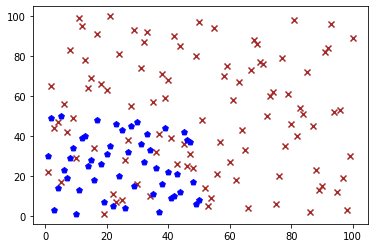

In [ ]:
mx = [val.inpX for val in df_inp.select('inpX').collect()]
my = [val.inpY for val in df_inp.select('inpY').collect()]
plt.scatter(mx, my, marker='x', color = 'brown')

tx = [val.trainX for val in df_train.select('trainX').collect()]
ty = [val.trainY for val in df_train.select('trainY').collect()]
plt.scatter(tx, ty, marker='p', color = 'blue')

plt.show()

Get the value for distance range from user

In [ ]:
range_val = 0
try:
  range_val = float(input("Enter the value for distance between the points: "))
except ValueError:
    print("This is not a number")    

Enter the value for distance between the points: 1


### We are going to find the size for the cells that the grid will split

In [ ]:
total_splits = 0
try:
  total_splits = int(input("Enter the value for splits: "))
except ValueError:
    print("This is not a number")  

Enter the value for splits: 40


In [ ]:
dimension_x = abs((max_quadranX - min_quadranX)) / total_splits
dimension_y = abs((max_quadranY - min_quadranY)) / total_splits

print(dimension_x, dimension_y)

2.475 2.475


### Before starting the process we are going to partition both dataframes

In [ ]:
print("*** Looking at partitions *** ")

### first for inp dataframe ### 
inp_partitionCount = df_inp.rdd.getNumPartitions()
print("Partition count before repartition: {}".format(inp_partitionCount))
df_inp = df_inp.repartition(1)
print("Partition count for input dataframe after repartition: {}".format(df_inp.rdd.getNumPartitions()))

### same for train dataframe ### 
train_partitionCount = df_train.rdd.getNumPartitions()
print("Partition count before repartition: {}".format(train_partitionCount))
df_train = df_train.repartition(1)
print("Partition count for train dataframe after repartition: {}".format(df_train.rdd.getNumPartitions()))

print("end of handling partitions")

*** Looking at partitions *** 
Partition count before repartition: 1
Partition count for input dataframe after repartition: 1
Partition count before repartition: 1
Partition count for train dataframe after repartition: 1
end of handling partitions


#### Create a function that calculates the distance between two points

In [ ]:
# Function to calculate distance between points using Pythagoras' theorem
import math
def distance(i1 , t1 , i2 , t2):
 
    return math.sqrt(math.pow(i2 - i1, 2) + math.pow(t2 - t1, 2) * 1.0)

In [ ]:
# function to call in order to calculate the points of train that are in range of points of input

def check_in_range(i, t, r):

  for a in range(i.count()) :
   for b in range(t.count()) :
    print( '(' , i.collect()[a][0] , i.collect()[a][1] , ')', '-', '(' , t.collect()[b][0] , t.collect()[b][1], ')')
    dist = distance(i.collect()[a][1] , i.collect()[a][0] , t.collect()[b][1] , t.collect()[b][0])

    if dist <= range_val :
      print("Points in range :", dist, "<=", r)
    else : 
      print("Points out of range :", dist, ">", r)
    
    print("----------------------")

### Now call the functions in order to get the requested results

In [ ]:
t4 = int(round(time.time() * 1000))

In [ ]:
list_with_range_flag = []
check_in_range(df_inp, df_train, range_val)

In [ ]:
t5 = int(round(time.time() * 1000))
print("Analyzing result in {} ms".format(t5 - t4))

Analyzing result in 19283 ms


In [ ]:
# the previous were just to test that spark was ok set up
spark.stop()